# 二、选择调色板（Choosing color palettes）

In [19]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

sns.set(rc={"figure.figsize": (6, 6)})
np.random.seed(sum(map(ord, "palettes")))

## 1 建立调色板（Building color palettes with color_palette()）
- color_palette()接受的参数包括：
  > - the name of any seaborn palette
  > - matplotlib colormap, except jet
  > - a list of colors specified in any valid matplotlib format (RGB tuples, hex color codes, or HTML color names)，返回值是包含RGB元组的列表  
- 如果color_palette()没有参数，则返回默认颜色风格
- 三种普遍的颜色板：qualitative, sequential, and diverging.

- color_palette() will accept the name of any seaborn palette or matplotlib colormap (except jet, which you should never use). It can also take a list of colors specified in any valid matplotlib format (RGB tuples, hex color codes, or HTML color names). The return value is always a list of RGB tuples.
- calling color_palette() with no arguments will return the current default color cycle.
- the three general kinds of color palettes: qualitative, sequential, and diverging.

## 2 类别调色板（Qualitative color palettes）
- 用于区分不同种类的数据（无序）
  > - 六种不同主题：deep, muted, pastel, bright, dark, and colorblind
- Qualitative (or categorical) palettes are best when you want to distinguish discrete chunks of data that do not have an inherent ordering.

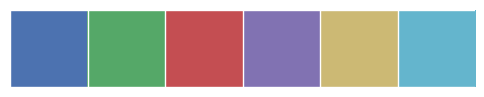

In [20]:
current_palette = sns.color_palette()
sns.palplot(current_palette)

### 2.1 循环颜色系统（Using circular color systems）
- 当需要的颜色超过六种时
- When you have more than six categories to distinguish, the easiest thing is to draw evenly-spaced colors in a circular color space (such that the hue changes which keeping the brightness and saturation constant). This is what most seaborn functions default to when they need to use more colors than are currently set in the default color cycle.

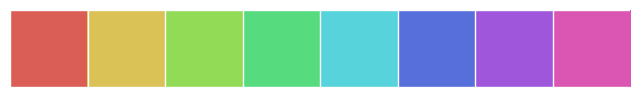

In [21]:
sns.palplot(sns.color_palette("hls", 8)) # uses the hls color space, which is a simple transformation of RGB values

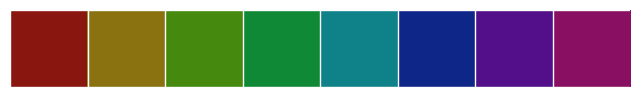

In [22]:
sns.palplot(sns.hls_palette(8, l=.3, s=.8)) # control the lightness and saturation of the colors

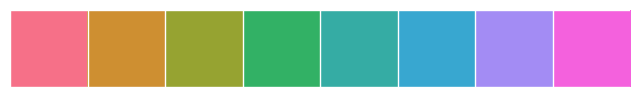

In [23]:
sns.palplot(sns.color_palette("husl", 8)) # select evenly spaced hues while keeping the apparent brightness and saturation much more uniform

### 2.2 Using categorical Color Brewer palettes

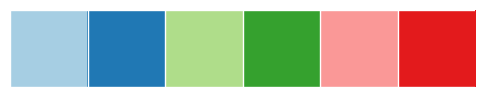

In [24]:
sns.palplot(sns.color_palette("Paired"))

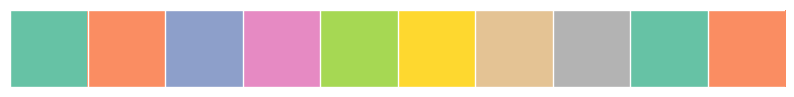

In [25]:
sns.palplot(sns.color_palette("Set2", 10)) #  choose_colorbrewer_palette() function.

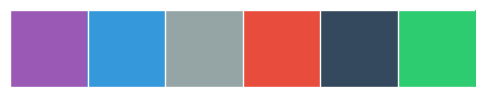

In [26]:
flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]
sns.palplot(sns.color_palette(flatui)) # use a set of colors you particularly like together

### 2.3 Using named colors from the xkcd color survey
- A while back, xkcd ran a crowdsourced effort to name random RGB colors. 
- This produced a set of 954 named colors, which you can now reference in seaborn using the xkcd_rgb dictionary:

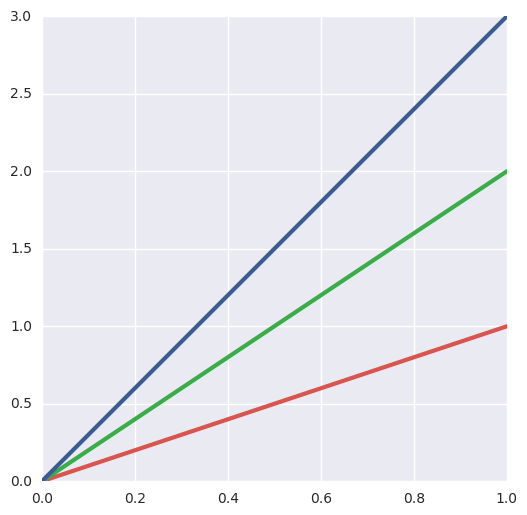

In [27]:
plt.plot([0, 1], [0, 1], sns.xkcd_rgb["pale red"], lw=3)
plt.plot([0, 1], [0, 2], sns.xkcd_rgb["medium green"], lw=3)
plt.plot([0, 1], [0, 3], sns.xkcd_rgb["denim blue"], lw=3);

- 自选颜色
- If you want to spend some time picking colors, this interactive visualization may be useful. 
- In addition to pulling out single colors from the xkcd_rgb dictionary, you can also pass a list of names to the xkcd_palette() function.

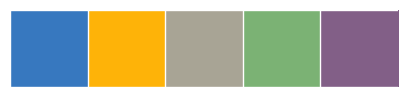

In [28]:
colors = ["windows blue", "amber", "greyish", "faded green", "dusty purple"]
sns.palplot(sns.xkcd_palette(colors))

## 3 序列调色板（Sequential color palettes）
- 
- This kind of color mapping is appropriate when data range from relatively low or unintersting values to relatively high or interesting values. Although there are cases where you will want discrete colors in a sequential palette, it’s more common to use them as a colormap in functions like kdeplot() or corrplot() (along with similar matplotlib functions).

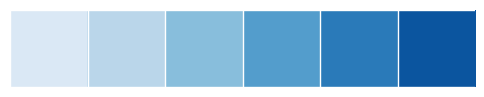

In [29]:
sns.palplot(sns.color_palette("Blues"))

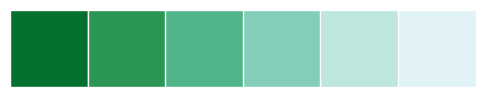

In [30]:
# Like in matplotlib, if you want the lightness ramp to be reversed, you can add a _r suffix to the palette name.
sns.palplot(sns.color_palette("BuGn_r"))

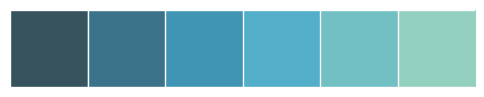

In [31]:
sns.palplot(sns.color_palette("GnBu_d"))

### 3.1 Sequential palettes with cubehelix_palette()

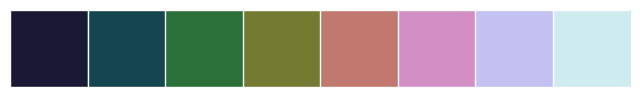

In [32]:
sns.palplot(sns.color_palette("cubehelix", 8))

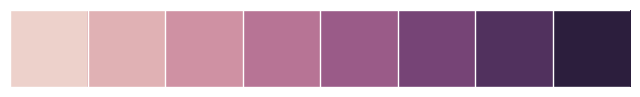

In [33]:
# The default palette returned by the seaborn cubehelix_palette() function is a bit different from the matplotlib default in 
# that it does not rotate as far around the hue wheel or cover as wide a range of intensities. 
# It also reverses the order so that more important values are darker:
sns.palplot(sns.cubehelix_palette(8))

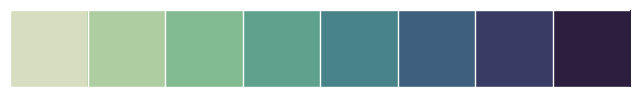

In [34]:
#  start (a value between 0 and 3) and rot, or number of rotations (an arbitrary value, but probably within -1 and 1),
sns.palplot(sns.cubehelix_palette(8, start=.5, rot=-.75))

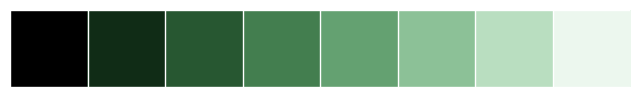

In [35]:
# control how dark and light the endpoints are and even reverse the ramp
sns.palplot(sns.cubehelix_palette(8, start=2, rot=0, dark=0, light=.95, reverse=True)) 

- By default you just get a list of colors, like any other seaborn palette, but you can also return the palette as a colormap object that can be passed to seaborn or matplotlib functions using as_cmap=True.
- use the choose_cubehelix_palette() function in a notebook to launch an interactive app that will let you play with the different parameters. - Pass as_cmap=True if you want the function to return a colormap (rather than a list) for use in function like hexbin.

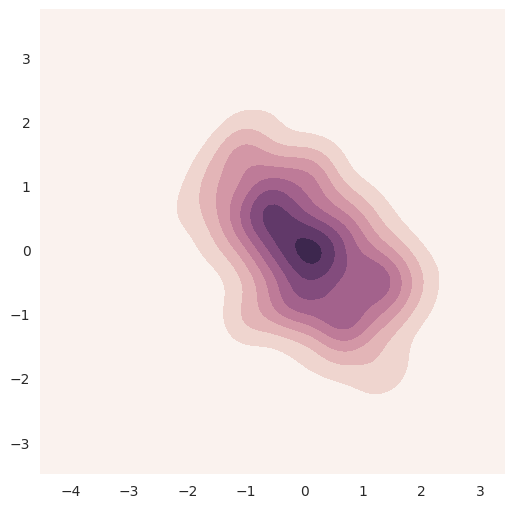

In [36]:
x, y = np.random.multivariate_normal([0, 0], [[1, -.5], [-.5, 1]], size=300).T
cmap = sns.cubehelix_palette(light=1, as_cmap=True)
sns.kdeplot(x, y, cmap=cmap, shade=True);

### 3.2 Custom sequential palettes with light_palette() and dark_palette()
-  both seeded with a single color and produce a palette that ramps either from light or dark desaturated values to that color.
- accompanied by the choose_light_palette() and choose_dark_palette()

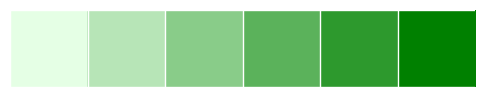

In [37]:
sns.palplot(sns.light_palette("green"))

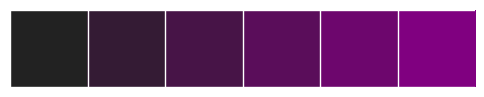

In [38]:
sns.palplot(sns.dark_palette("purple"))

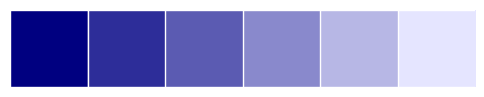

In [39]:
sns.palplot(sns.light_palette("navy", reverse=True)) # 翻转

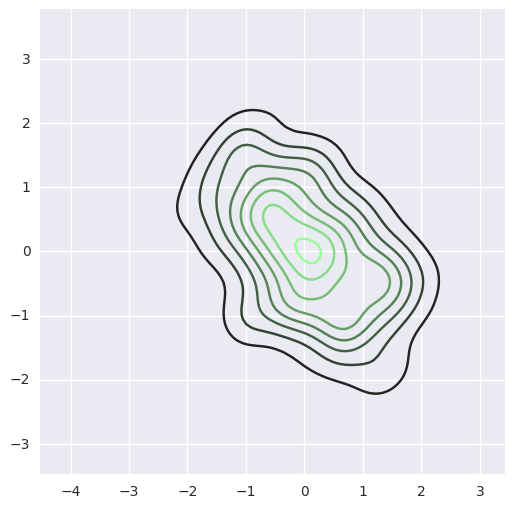

In [40]:
pal = sns.dark_palette("palegreen", as_cmap=True) # to create colormap objects rather than lists of colors.
sns.kdeplot(x, y, cmap=pal);

- Currently you can provide tuples in hls or husl space along with the default rgb, and you can also seed the palette with any valid xkcd color.
- Note that the default input space for the interactive palette widgets is husl

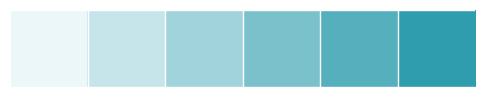

In [41]:
sns.palplot(sns.light_palette((210, 90, 60), input="husl"))

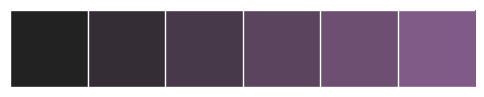

In [42]:
sns.palplot(sns.dark_palette("muted purple", input="xkcd"))

## 4 离散调色板（Diverging color palettes）
- 中间设置起点，两边颜色逐渐变动
- These are used for data where both large low and high values are interesting. There is also usually a well-defined midpoint in the data. For instance, if you are plotting changes in temperature from some baseline timepoint, it is best to use a diverging colormap to show areas with relative decreases and areas with relative increases.
- It’s also important to emphasize here that using red and green should be avoided, as a substantial population of potential viewers will be unable to distinguish them.

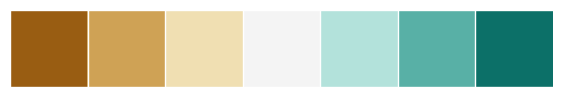

In [46]:
sns.palplot(sns.color_palette("BrBG", 7))

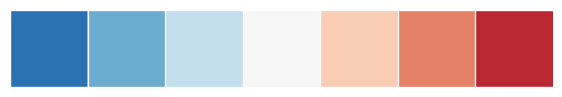

In [47]:
sns.palplot(sns.color_palette("RdBu_r", 7))

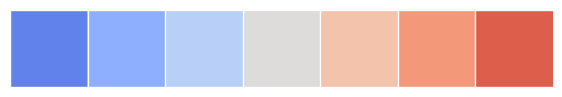

In [48]:
# Another good choice that is built into matplotlib is the coolwarm palette. 
# Note that this colormap has less contrast between the middle values and the extremes.
sns.palplot(sns.color_palette("coolwarm", 7))

### 4.1 Custom diverging palettes with diverging_palette()
- You pass it two hues (in degreees) and, optionally, the lightness and saturation values for the extremes. 
- Using husl means that the extreme values, and the resulting ramps to the midpoint, will be well-balanced

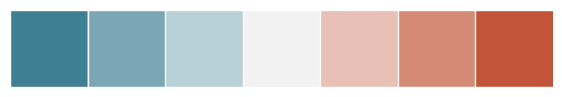

In [49]:
sns.palplot(sns.diverging_palette(220, 20, n=7))

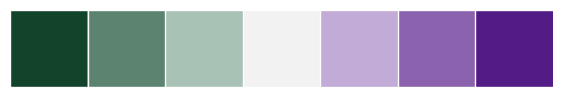

In [50]:
sns.palplot(sns.diverging_palette(145, 280, s=85, l=25, n=7))

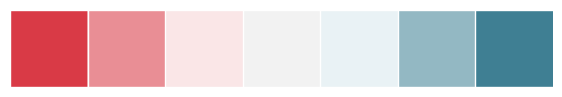

In [51]:
# The sep argument controls the width of the separation between the two ramps in the middle region of the palette.
sns.palplot(sns.diverging_palette(10, 220, sep=80, n=7))

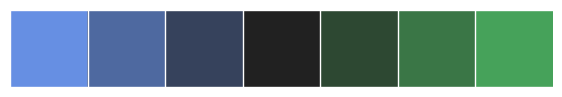

In [52]:
# make a palette with the midpoint is dark rather than light.
sns.palplot(sns.diverging_palette(255, 133, l=60, n=7, center="dark"))

## 5 更改默认值（Changing default palettes with set_palette()）
- set_palette() accepts the same arguments as color_palette(), but it changes the default matplotlib parameters so that the palette is used for all plots.

In [43]:
def sinplot(flip=1):
    x = np.linspace(0, 14, 100)
    for i in range(1, 7):
        plt.plot(x, np.sin(x + i * .5) * (7 - i) * flip)

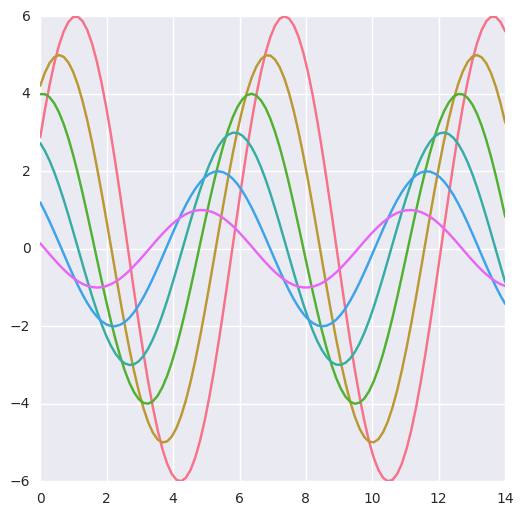

In [44]:
sns.set_palette("husl")
sinplot()

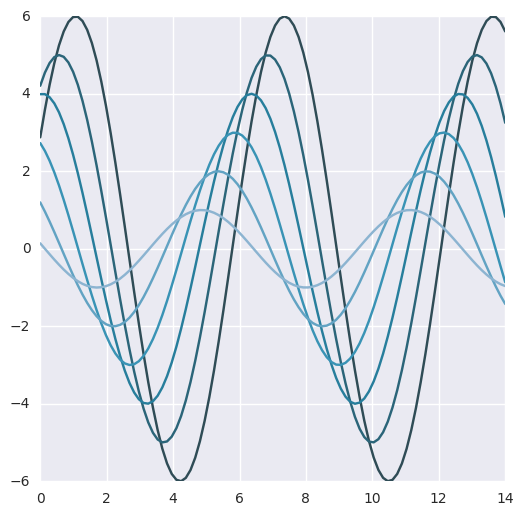

In [45]:
with sns.color_palette("PuBuGn_d"):  # be used in a with statement to temporarily change the color palette.
    sinplot()